# Travail Pratique #2

## IKEA - l'expert du meuble à assembler

### Les produits IKEA

Le fabricant de meubles suédois IKEA a fait sa marque en concevant des meubles de belle apparence, à prix modique et simples à assembler. Chaque produit disponible au catalogue a un numéro au format xx.xxx.xx identifiant de façon unique le produit. De plus, un nom commun est aussi associé à une gamme de produits ayant le même design.

Chaque produit vendu est en fait un kit devant être assemblé par le client. Pour faciliter leur livraison, chaque produit est pré-amballé dans une ou plusieurs boîtes, clairement identifiées au numéro du produit. Ces boîtes contiennent les instructions d'assemblage et les pièces composant le produit, dont certaines sont en fait les outils nécessaires pour compléter l'assemblage. Le client termine la fabrication du meuble en suivant les instructions fournies avec le kit. 

#### Pré-emballage des produits

Au moment du pré-emballage des produits par IKEA, chaque produit est associé à une liste de composantes (boîte(s) identifiée(s) au produit, instructions, outils, pièces) qui sont cueillis et empaquetés avec soin dans la(les) boîte(s) du produit. Ces boîtes sont acheminées dans les magasins IKEA à travers le monde.

#### Récupération des produits par les clients

Plusieurs produits sont disponibles dans l'entrepôt libre service. Dans ce cas, le client en fera lui-même la cueillette. D'autres produits ne sont disponibles qu'à l'entrepôt central du magasin. Dans ce cas, le client doit passer une commande et ce sont les employés d'IKEA qui font la cueillette. Le client pourra récupérer les produits commandés une fois la cueillette complétée ou pourra décider de faire livrer le tout à son adresse. 

### Le service de conception de cuisine

Un des services les plus prisés d'IKEA est celui de conception de cuisine. En particulier, les clients peuvent utiliser une application Web permettant de construire sa cuisine et d'identifier les produits à acheter pour le faire.

![design](./MyDesign.jpg)

Une fois le plan complété, le client peut extraire une liste d'achats et passer la commande des produits requis.

#### Données disponibles

Pour répondre aux questions 1 et 2, vous avez accès à 3 sources de données :

1. **Le catalogue de produits** (fichier `catalogue.tsv`) : Il s'agit de la liste de tous les produits vendus par IKEA dans ses magasins entrepôts. Le fichier contient une ligne d'entête et les colonnes sont séparées par des tabulations (`\t`). Cette liste contient les éléments suivants :

    - Le numéro du produit. Ce numéro a la forme `xx.xxx.xxx` (p.ex., 50.341.643);
    - La gamme du produit. C'est le nom du groupe de produits (p.ex., ÄLMAREN);
    - La description du produit. Ce texte décrit le produit de façon détaillée (p.ex., "kitchen faucet stainless steel color");
    - Le prix de vente du produit. Le prix en dollars canadiens (p.ex., 99.00).
    
    
2. **La nomenclature des produits** (fichier `bom.tsv`) : Il s'agit de la liste des composantes d'un produit. Le fichier contient une ligne d'entête et les colonnes sont séparées par des tabulations (`\t`). On associe à chaque produit les codes des composantes et la quantité. Cette liste contient les éléments suivants :

    - Le numéro du produit. Ce numéro a la forme `xx.xxx.xxx` (p.ex., 50.341.643);
    - Le numéro de la composante. Ce numéro a la forme `xxxxxx`;
    - La quantité requise. Indique combien d'unités de la composante sont requises pour ce produit.

    **Certains produits n'ont pas de composantes, auquel cas il n'y a pas de données correspondantes dans la nomenclature.**


3. **La liste des ventes de l'année 2020 ** (fichier `ventes.tsv`) : Il s'agit de l'ensemble des ventes des produits pour une année donnée. Le fichier contient une ligne d'entête et les colonnes sont séparées par des tabulations (`\t`). Cette liste contient les éléments suivants :

    - Le numéro de la commande. Il s'agit d'un numéro de 10 chiffres identifiant la commande de façon unique dans une année;
    - La date de la commande. Cette donnée est dans le format `aaaa-mm-jj`;
    - Le numéro de l'item. Il s'agit d'un numéro identifiant la ligne de commande;
    - Le numéro du produit. Ce numéro a la forme `xx.xxx.xxx` (p.ex., 50.341.643);
    - La quantité commandée. Indique combien d'unités du produit sont commandés pour cette item.


## Question 1 : Données MRP (8 points)

Une des tâches des gestionnaires d'IKEA est de déterminer le stock de composantes requis pour combler la demande pour une saison. C'est le résultat de l'exécution du processus MRP (*Material Requirement Planning*). Ce que nous vous proposons de réaliser est de :

- **Produire un rapport permettant de déterminer la quantité de chaque composante qui a été requise pour remplir des commandes des clients de l'année précédente, pour chaque mois.**
    

### Contraintes

* Votre programme **NE DOIT PAS** utiliser la librairie `pandas`.
* Le rapport doit produire un tableau :
    - La première colonne est le numéro de la composante
    - Les autres colonnes correspondent aux mois
    - Les lignes correspondent à chaque composante
    - Les lignes sont triées par numéro de composante
    
Voici à quoi doit ressembler la sortie :

![requis mensuels](./requis_mensuels.jpg)


### Barême

- Noté sur **8**
- Commentaires : **2 points**. Vous devez clairement expliquer comment vous procédez, soit avec du *Markdown*, soit avec des commentaires dans le code Python.
- Structure de données : **2 point**. Les structures de données choisies doivent être adéquates pour résoudre le problème de façon efficace. Vos commentaires pourront servir à justifier le choix de structure.
- Logique : **3 points**. La logique de votre code doit permettre de résoudre le problème. Si votre programme ne s'exécute pas correctement, la logique sera analysée pour identifier les éléments corrects.
- Exécution du code : **1 point**. Votre programme doit produire le résultat attendu.

In [124]:
#Q1
# On créer un dictionnaire qui va contenir d'autre dictionnaires: {'NuméroProduit':{'composant':quantité}} pour chaque
# produits et composants différents. Tout ca lu depuis le fichier bom.tsv.
produit = {}

# Ouverture du fichier et lecture de la première ligne pour ne pas prendre en compte les entêtes
with open("bom.tsv") as bom_file:
    bom_file.readline()
    
    # Pour chaque ligne dans le fichier ...  
    for line in bom_file:
        
        # On sépare les différents éléments de la ligne, et on enlève les "\n"
        element = line.strip('\n').split("\t")
        
        # Si le numéro de produit extrait n'existe pas déjà dans le dictionnaire ... 
        if produit.get(element[0]) is None:
            # Il créer une nouvelle clef dont la valeur est un dictionnaire -> {'composant':quantité}
            produit[element[0]] = {element[1]:int(element[2])}
        
        # Sinon...
        else:
            # Il ajoute un nouveau composant au produit que l'on regarde
            produit[element[0]][element[1]] = int(element[2])
            
#Je créer un nouveau dictionnaire pour rentrer les valeurs des quantités par mois, par produit
produit_mois ={}
# Ouverture du fichier et lecture de la première ligne pour ne pas prendre en compte les entêtes
with open("ventes.tsv") as ventes_file:
    ventes_file.readline()
    
    # Pour chaque ligne dans le fichier ...  
    for line in ventes_file:
        
        # On sépare les différents éléments de la ligne, et on enlève les "\n"
        element = line.strip('\n').split("\t")
        # On stock dans la variable mois seulement la deuxieme partie de la date qui est séparé par un tiret
        mois = element[1].split("-")
        
        # Si le mois extrait n'existe pas déjà dans le dictionnaire ... 
        if produit_mois.get(mois[1]) is None:
            # Alors il créer un nouveau dictionnaire ayant pour clef le numéro de produit et pour valeur la quantité
            produit_mois[mois[1]] = {element[3]:int(element[4])}
            
        # Sinon ...    
        else:
            # Si pour le mois considéré, le produit n'a pas encore été vu
            if produit_mois[mois[1]].get(element[3]) is None:
                # Alors on ajoute dans le dictionnaire dont la clef est le mois, une nouvelle entrée dont la clef est 
                # le produit, et la valeur la qte de produit
                produit_mois[mois[1]][element[3]] = int(element[4])
            
            #Sinon...(c'est qu'on a deja enregistré le produit pour le mois en cours)
            else:
                # On additionne a la qte de produit déjà enregistrée la nouvelle qte que l'on est en train de lire
                produit_mois[mois[1]][element[3]] += int(element[4])

# On créer une liste pour stocler la liste finale des quantités par mois et par composant
liste = []
# Pour chaque mois dans le dictionnaire produit_mois
for mois in produit_mois:
    # On créer un dictionnaire
    composantsRequis= {}
    # Pour chaque noProduit dans tous les produits du mois considéré
    for noProduit in produit_mois[mois]:
        # Si le numéro de produit n'existe pas déjà...
        if produit.get(noProduit) is not None:
            # Alors pour tous les composants de ce produits
            for composant in produit[noProduit]:
                # Mais si l'on a pas déjà ajouté ce composant dans la liste des composants requis pour le mois en cours
                if composantsRequis.get(composant) is None:
                    # alors on ajoute une nouvelle entrée au dictionnaire des composants requis, 
                    # clef : numéro du composant; valeur : qte de composants pour le produits * qte de produits commandés
                    composantsRequis[composant]= produit[noProduit][composant] * produit_mois[mois][noProduit]
                # Sinon... 
                else:
                    # J'ajoute la bonne qte de composants à la valeur déjà enregistrée
                    composantsRequis[composant]+= produit[noProduit][composant] * produit_mois[mois][noProduit]
    # Tri de la liste des composants du mois en cours, par numéro de composant               
    liste.append(sorted(composantsRequis.items(), key=lambda t: t[0]))
    
# Je créer une liste pour les entêtes en laissant un espace au début pour la mise en page
mois = ['','Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul','Aoû','Sep','Oct', 'Nov', 'Déc']

# Création et affichage de la première ligne (les mois)
# Pour chaque colonne (mois + 1ere colone vide pour la mise en page) 
ligne = ""
for i in mois:
    
    # Concatenation de l'entête de la colonne (colone vide ou nom du mois) 
    ligne += i
    
    # J'ajoute suffisamment d'espaces pour faire des colonnes de 10 caractères
    for j in range(10-len(i)):
        ligne += " "
print(ligne)

# Construction des lignes avec les données
# Pour tous les produits
for i in range(len(liste[0])):
    # Création de la ligne vide au début
    ligne = ""
    # J'ajoute le numéro du composant
    ligne += liste[0][i][0]
    
    # Ajout des espaces pour la mise en page
    for k in range(10-len(liste[0][i][0])):
        ligne += " "
    # Pour chaque mois on ajoute la quantité requise pour le composant en question    
    for j in range(len(mois)-1):
        ligne += str(liste[j][i][1])
        # On rajoute des espaces pour avoir une bonne mise en page ;)
        for k in range(10-len(str(liste[j][i][1]))):
            ligne += " "
            
    # On affiche un beau tableau tout propre
    print(ligne)

          Jan       Fév       Mar       Avr       Mai       Jun       Jul       Aoû       Sep       Oct       Nov       Déc       
102437    3780      3618      4122      4212      3294      3510      3888      3960      3690      3330      3384      2790      
107091    4880      4880      5105      4773      5256      5113      5279      5362      4955      5000      4930      3577      
109510    18782     18122     20285     20453     17098     17907     19457     19850     18421     17060     17260     13903     
109535    17522     17422     18063     17231     18686     18561     18435     19142     17279     17772     17868     13317     
110084    231       211       208       200       203       205       220       196       216       191       219       143       
111111    68568     64464     66760     64040     68504     66640     67752     69408     63864     63800     63912     47960     
114149    15120     14472     16488     16848     13176     14040     15552     158

## Question 2 : Rapports des ventes (6 points)

En utilisant les données disponibles (`catalogue.tsv` et `ventes.tsv`), on vous demande de produire les rapports suivants :

1. Ventes totales pour l'année (en dollars) : le résultat pour 2020


In [125]:
# Import des modules
import pandas as pd
from prettytable import PrettyTable
import seaborn
import locale
locale.setlocale(locale.LC_ALL, 'English_United States.1252')

'English_United States.1252'

In [127]:
# Création et jointure des différentes dataframe et suppressions des colonnes inutiles 
catalogue = pd.read_table('catalogue.tsv')
catalogue = catalogue.drop(['Description'], axis=1)

ventes = pd.read_table('ventes.tsv')
ventes = ventes.drop(['NoItem'], axis=1) 

df = pd.merge(catalogue, ventes)

# Mise en place des différentes colones utiles pour les questions
# Transformation des colonnes Prix et Quantité en int pour pouvoir faire des opérations
df = df.astype({"Prix":int,"Quantite":int})

# Création d'une nouvelle colonne Ventes (multiplication de prix et quantité)
df['Ventes'] = df.Prix * df.Quantite

# Création d'une nouvelle colonne DateCommande étant la transformation dy type de la colonne DateCommande en datetime64
df['DateCommande'] = pd.to_datetime(df.DateCommande)

# Création d'une nouvelle colonne MoisNo affichant les numéros des mois
df['MoisNo'] = df.DateCommande.dt.month

# Création d'une nouvelle colonne Mois affichant les noms des mois
df['Mois'] = df.DateCommande.dt.month_name(locale='French')

# Création d'une nouvelle colonne Année affichant les années
df['Année'] = df.DateCommande.dt.year

# Création d'une nouvelle colonne JourNo affichant les numéros des jours
df['JourNo'] = df.DateCommande.dt.day

# Création d'une nouvelle colonne Année affichant les noms des jours
df['Jour'] = df.DateCommande.dt.day_name(locale='French')



In [4]:
#Q1
print("Question 1:")
# On créer un nouveau DF regroupant les année en faisant la somme
df_sales_by_year = df.groupby(["Année"])[["Ventes"]].sum()
df_sales_by_year = df_sales_by_year.reset_index()
# On stock les titres des colonnes de df_sales_by_year dans une variable de type liste
pt = PrettyTable(field_names = list(df_sales_by_year.columns))
# lire le contenu du dataframe 'df_sales_by_year', un enregistrement à la fois, pour tous les attributs
# et stocker les valeurs dans un tableau "array"
[ pt.add_row(line) for line in df_sales_by_year.to_records(index = False) ]

print(pt)

Question 1:
+-------+----------+
| Année |  Ventes  |
+-------+----------+
|  2020 | 27078601 |
+-------+----------+


2. Ventes mensuelles de 2020 (en dollars) : tableau et graphique à barre par mois (avec le nom du mois)

![ventes mensuelles](./ventes_mensuelles.jpg)

Question 2:
+-----------+---------+
|    Mois   |  Ventes |
+-----------+---------+
|  Janvier  | 2318693 |
|  Février  | 2240206 |
|    Mars   | 2348210 |
|   Avril   | 2268867 |
|    Mai    | 2353884 |
|    Juin   | 2273386 |
|  Juillet  | 2384783 |
|    Août   | 2392257 |
| Septembre | 2241713 |
|  Octobre  | 2315065 |
|  Novembre | 2264155 |
|  Décembre | 1677382 |
+-----------+---------+


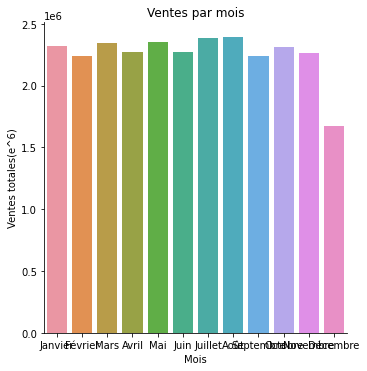

In [5]:
#Q2
print("Question 2:")
# Nouveau DateFrame df_sales_month avec les colones de "MoisNo", "Mois", "Ventes" de df
df_sales_month = df[["MoisNo", "Mois", "Ventes"]]
# On groupby et on fait la somme
df_sales_month = df_sales_month.groupby(['MoisNo', 'Mois']).sum("Ventes")
# On sort la colonne Mois de l'index
df_sales_month=df_sales_month.reset_index('Mois')
# identique a Q1
pt_sales_month = PrettyTable(field_names = list(df_sales_month.columns))
[ pt_sales_month.add_row(line) for line in df_sales_month.to_records(index = False) ]
print(pt_sales_month)
# Création du graphique en bar avec les bonnes légendes
seaborn.catplot(kind='bar', x='Mois', y='Ventes', data=df_sales_month).\
    set(xlabel='Mois', ylabel='Ventes totales(e^6)', title='Ventes par mois')

3. Ventes de 2020 selon le jour de la semaine (en dollars) : tableau et graphique à barre par jour (avec le nom du jour)

![ventes quotidiennes](./ventes_quotidiennes.jpg)

Question 3:
+----------+---------+
| Jour     |  Ventes |
+----------+---------+
| Lundi    | 3829833 |
| Mardi    | 3871496 |
| Mercredi | 3884797 |
| Jeudi    | 3837160 |
| Vendredi | 3845398 |
| Samedi   | 3917938 |
| Dimanche | 3891979 |
+----------+---------+


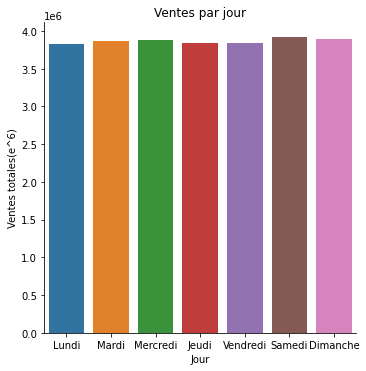

In [6]:
#Q3 Identique à la question 2 avec juste la création de mon propre index pour mettre dans le bon ordre et de la mise
# en page des colonnes
print("Question 3:")
df_sales_day = df[["Jour", "Ventes"]]
df_sales_day = df_sales_day.groupby(['Jour']).sum("Ventes").\
reindex(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']).reset_index()
pt_sales_day = PrettyTable(field_names = list(df_sales_day.columns))
[ pt_sales_day.add_row(line) for line in df_sales_day.to_records(index = False) ]
pt_sales_day.align['Jour'] = "l"
pt_sales_day.align['Ventes'] = "r"
print(pt_sales_day)
seaborn.catplot(kind='bar', x='Jour', y='Ventes', data=df_sales_day).\
    set(xlabel='Jour', ylabel='Ventes totales(e^6)', title='Ventes par jour')

4. Ventes totales de 2020 par produit (en nombre d'unités vendues) : tableau seulement (le nom du produit, puis le numéro)

![ventes produits base](./ventes_produits_base.jpg)

In [97]:
#Q4 Rien de nouveau dans le code similaire aux questions d'avant
print("Question 4:")
df_sales_by_name = df[["Nom", "NoProduit", "Ventes"]]
df_sales_by_name = df_sales_by_name.groupby(['Nom','NoProduit']).sum('Ventes').reset_index()
pt_sales_by_name = PrettyTable(field_names=['Nom','No','Ventes'])
[ pt_sales_by_name.add_row(line) for line in df_sales_by_name.to_records(index = False) ]
pt_sales_by_name.align['Nom'] = "l"
pt_sales_by_name.align['No'] = "l"
pt_sales_by_name.align['Ventes'] = "r"
print(pt_sales_by_name)

Question 4:
+---------------+------------+---------+
| Nom           | No         |  Ventes |
+---------------+------------+---------+
| ASKERSUND     | 70.425.236 |  653670 |
| AXSTAD        | 00.426.055 |  298680 |
| AXSTAD        | 00.426.079 |  173670 |
| AXSTAD        | 10.426.050 | 1754350 |
| AXSTAD        | 10.426.069 |   53548 |
| AXSTAD        | 30.426.054 |  171010 |
| AXSTAD        | 30.426.068 |   77888 |
| AXSTAD        | 40.426.058 |  522690 |
| AXSTAD        | 40.429.434 |  182250 |
| AXSTAD        | 50.426.067 |   65718 |
| AXSTAD        | 50.426.072 |  245125 |
| AXSTAD        | 60.426.076 |  308880 |
| AXSTAD        | 70.426.071 |  343175 |
| AXSTAD        | 80.426.056 |  378768 |
| AXSTAD        | 80.426.075 |   65961 |
| AXSTAD        | 90.426.046 |  511344 |
| AXSTAD        | 90.426.070 |  294150 |
| EKBACKEN      | 50.397.178 |  642060 |
| EKBACKEN      | 70.397.177 |  200320 |
| FÖRBÄTTRA     | 40.287.590 |  359550 |
| FÖRBÄTTRA     | 80.266.411 |   85085 |
| HA

In [121]:
#Q4 Bonus
# On prend la database précédente que l'on groupby, somme et reset l'index
df_sales_by_name = df[["Nom", "NoProduit", "Ventes"]]
df_sales_by_name = df_sales_by_name.groupby(['Nom','NoProduit']).sum('Ventes').reset_index('Nom')
df_sales_by_name = df_sales_by_name.reset_index('NoProduit')
# On créer une liste colonne et un dictionnaire dico_colonne
colonne = []
dico_colonne = {}
# Pour chaque nom dans df_sales_by_name.Nom on regarde si le nom existe déja ou pas et si ce n'est pas le cas alors on le
# rajoute au dictionnaire sinon on met un espace
for i in df_sales_by_name.Nom:
    if dico_colonne.get(i) is None:
        dico_colonne[i] = 1
        colonne.append(i)
    else:
        colonne.append(" ")
# Finalement on insert la nouvelle colonne avec les noms et les espaces dans la df 'df_sales_by_name'
df_sales_by_name.insert(0, 'nomTrié', colonne)
# on supprime la colonne Nom
df_sales_by_name = df_sales_by_name.drop(['Nom'], axis=1)
# On créer la prettyTable avec les entêtes que l'on veut
pt_sales_by_name = PrettyTable(field_names=['Nom','No','Ventes'])
# Comme les questions précédentes
[ pt_sales_by_name.add_row(line) for line in df_sales_by_name.to_records(index = False) ]
pt_sales_by_name.align['Nom'] = "l"
pt_sales_by_name.align['No'] = "l"
pt_sales_by_name.align['Ventes'] = "r"
print(pt_sales_by_name)
# Le tour est joué 

+---------------+------------+---------+
| Nom           | No         |  Ventes |
+---------------+------------+---------+
| ASKERSUND     | 70.425.236 |  653670 |
| AXSTAD        | 00.426.055 |  298680 |
|               | 00.426.079 |  173670 |
|               | 10.426.050 | 1754350 |
|               | 10.426.069 |   53548 |
|               | 30.426.054 |  171010 |
|               | 30.426.068 |   77888 |
|               | 40.426.058 |  522690 |
|               | 40.429.434 |  182250 |
|               | 50.426.067 |   65718 |
|               | 50.426.072 |  245125 |
|               | 60.426.076 |  308880 |
|               | 70.426.071 |  343175 |
|               | 80.426.056 |  378768 |
|               | 80.426.075 |   65961 |
|               | 90.426.046 |  511344 |
|               | 90.426.070 |  294150 |
| EKBACKEN      | 50.397.178 |  642060 |
|               | 70.397.177 |  200320 |
| FÖRBÄTTRA     | 40.287.590 |  359550 |
|               | 80.266.411 |   85085 |
| HAVSEN        

### Contraintes

* Votre programme **DOIT** utiliser la librairie `pandas`.
* Vous devez afficher les tableaux avec la librairie `prettytable`.
* Vous devez afficher les graphiques à barre avec la librairie `seaborn`.

### Barême

- Noté sur **6**
- Commentaires : **2 points**. Vous devez clairement expliquer comment vous procédez, soit avec du *Markdown*, soit avec des commentaires dans le code Python.
- Logique : **3 points**. La logique de votre code doit permettre de résoudre le problème. Si votre programme ne s'exécute pas correctement, la logique sera analysée pour identifier les éléments corrects.
- Exécution du code : **1 point**. Votre programme doit produire le résultat attendu.
- **Boni** : Un boni de 1 point sera accordé si vous produisez le tableau de manière à ce que le nom du produit ne soit pas répété.

![ventes produits boni](./ventes_produits_boni.jpg)